In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

# Divisiones

In [33]:
data = pd.read_csv('ipc.csv', na_values=' ')

In [34]:
data.columns = ['Year', 'Month', 'División', 'Grupo', 'Clase', 'Subclase', 'Producto',
       'Glosa', 'Ponderación', 'Índice', 'Variación Mensual  ( % )',
       'Variación Acumulada   ( % )', 'Variación 12 Meses   ( % )',
       'Incidencia Mensual   ( % )', 'Incidencia Acumulada    ( % )',
       'Incidencia 12 Meses    ( % )']

In [35]:
data['Fecha'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

In [36]:
data = data[['Fecha', 'División', 'Grupo', 'Clase', 'Subclase', 'Producto', 'Glosa', 'Índice']]

In [37]:
division = [
    'ALIMENTOS Y BEBIDAS NO ALCOHÓLICAS',
    'BEBIDAS ALCOHÓLICAS Y TABACO',
    'VESTUARIO Y CALZADO',
    'VIVIENDA Y SERVICIOS BÁSICOS',
    'EQUIPAMIENTO Y MANTENCIÓN DEL HOGAR',
    'SALUD',
    'TRANSPORTE',
    'COMUNICACIONES',
    'RECREACIÓN Y CULTURA',
    'EDUCACIÓN',
    'RESTAURANTES Y HOTELES',
    'BIENES Y SERVICIOS DIVERSOS']

In [38]:
div = data[['Fecha', 'Glosa','Índice']]
div = div[div['Glosa'].isin(division)]
div = div.set_index(['Fecha', 'Glosa'])

In [39]:
div['i0'] = div.groupby(level='Glosa').transform('first')
div['index'] = div['Índice'] / div['i0'] * 100
div = div[['index']].reset_index()

In [40]:
div = pd.pivot_table(div, values='index', index='Fecha', columns='Glosa')

In [41]:
ranking = (div.loc['2021-11-01'].sort_values(ascending=False) - 100 ).round(1)
orden = ranking.index
ranking

Glosa
RECREACIÓN Y CULTURA                   21.3
TRANSPORTE                             17.8
ALIMENTOS Y BEBIDAS NO ALCOHÓLICAS     17.5
RESTAURANTES Y HOTELES                 13.5
VIVIENDA Y SERVICIOS BÁSICOS           12.8
EQUIPAMIENTO Y MANTENCIÓN DEL HOGAR    12.1
BIENES Y SERVICIOS DIVERSOS            11.5
EDUCACIÓN                              11.3
SALUD                                   6.8
BEBIDAS ALCOHÓLICAS Y TABACO            6.2
VESTUARIO Y CALZADO                     1.4
COMUNICACIONES                         -4.5
Name: 2021-11-01 00:00:00, dtype: float64

<AxesSubplot:ylabel='Glosa'>

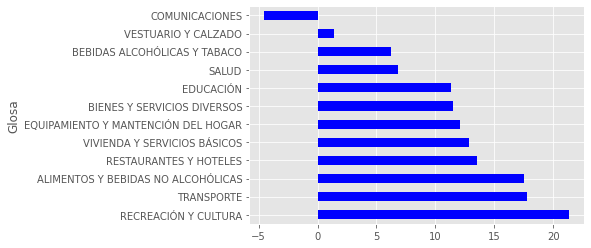

In [42]:
ranking.round(1).plot.barh(color='blue')

<AxesSubplot:xlabel='Fecha'>

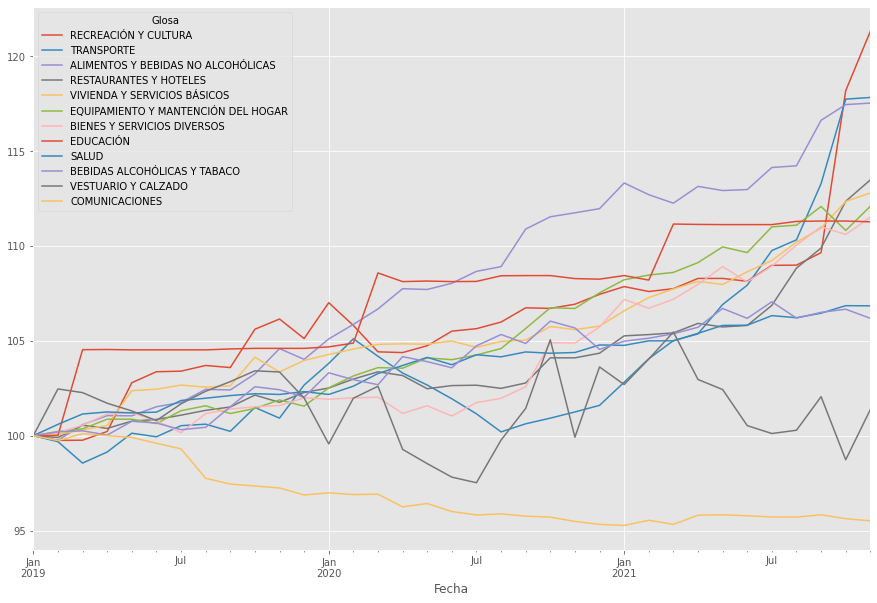

In [43]:
div[orden].plot(figsize=(15,10))

In [44]:
o1 = orden[:4]
o2 = orden[4:8]
o3 = orden[8:]

array([[<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>]],
      dtype=object)

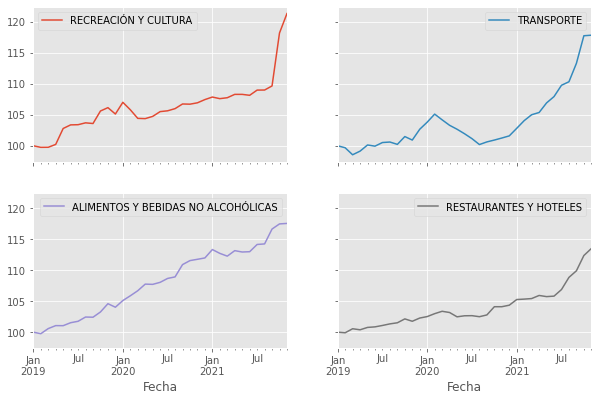

In [45]:
div[o1].plot(subplots=True, layout=(6,2), figsize=(10,20), sharey=True)

array([[<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>]],
      dtype=object)

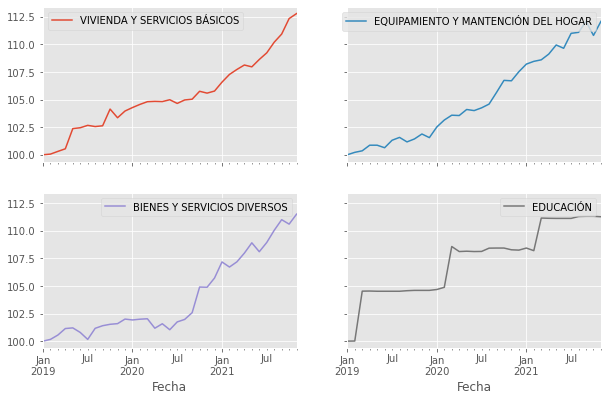

In [46]:
div[o2].plot(subplots=True, layout=(6,2), figsize=(10,20), sharey=True)

array([[<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>],
       [<AxesSubplot:xlabel='Fecha'>, <AxesSubplot:xlabel='Fecha'>]],
      dtype=object)

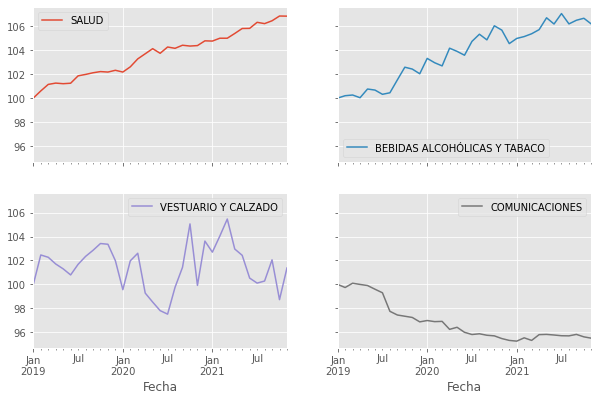

In [47]:
div[o3].plot(subplots=True, layout=(6,2), figsize=(10,20), sharey=True)

# Grupos

In [48]:
grupos = ['ALIMENTOS',
'BEBIDAS ALCOHÓLICAS',
'VESTUARIO',
'ARRIENDOS EFECTIVOS',
'MUEBLES Y ACCESORIOS PARA EL HOGAR',
'PRODUCTOS, ARTEFACTOS Y EQUIPOS MÉDICOS',
'ADQUISICIÓN DE VEHÍCULOS',
'EQUIPOS  TELEFÓNICOS',
'EQUIPO AUDIOVISUAL, FOTOGRÁFICO Y DE PROCESAMIENTO INFORMÁTICO',
'ENSEÑANZA PRE-ESCOLAR Y ENSEÑANZA BÁSICA (PRIMARIA)',
'SERVICIOS SUMINISTRADOS POR RESTAURANTES Y HOTELES',
'CUIDADO PERSONAL',
'BEBIDAS NO ALCOHÓLICAS',
'TABACO',
'CALZADO',
'CONSERVACIÓN Y REPARACIÓN DE LA VIVIENDA',
'TEXTILES PARA EL HOGAR',
'SERVICIOS PARA PACIENTES EXTERNOS',
'FUNCIONAMIENTO DE VEHÍCULOS DE TRANSPORTE PERSONAL',
'SERVICIOS DE TELECOMUNICACIONES',
'OTROS EQUIPOS Y ARTÍCULOS PARA LA RECREACIÓN, FLORES, JARDINERÍA Y MASCOTAS',
'ENSEÑANZA MEDIA (SECUNDARIA)',
'SERVICIOS DE ALOJAMIENTO',
'OTROS ARTÍCULOS PERSONALES',
'SUMINISTROS DE AGUA Y SERVICIOS DIVERSOS RELACIONADOS CON LA VIVIENDA',
'ARTEFACTOS PARA EL HOGAR',
'SERVICIOS DE HOSPITAL',
'SERVICIOS DE TRANSPORTE',
'SERVICIOS DE RECREACIÓN Y CULTURA',
'ENSEÑANZA POSTSECUNDARIA NO TERCIARIA',
'SEGUROS',
'ELECTRICIDAD, GAS Y OTROS COMBUSTIBLES',
'ARTÍCULOS DE VIDRIO Y CRISTAL, VAJILLA Y UTENSILIOS PARA EL HOGAR',
'PERIÓDICOS, LIBROS Y ÚTILES DE OFICINA',
'ENSEÑANZA SUPERIOR (TERCIARIA)',
'SERVICIOS FINANCIEROS',
'HERRAMIENTAS Y EQUIPOS PARA EL HOGAR Y EL JARDÍN',
'PAQUETES TURÍSTICOS',
'ENSEÑANZA NO ATRIBUIBLE A NINGÚN NIVEL U OTRAS ENSEÑANZAS',
'OTROS SERVICIOS',
'BIENES Y SERVICIOS PARA LA CONSERVACIÓN CORRIENTE DEL HOGAR']

In [49]:
div = data[['Fecha', 'Glosa','Índice']]
div = div[div['Glosa'].isin(grupos)]
div = div.set_index(['Fecha', 'Glosa'])
div['i0'] = div.groupby(level='Glosa').transform('first')
div['index'] = div['Índice'] / div['i0'] * 100
div = div[['index']].reset_index()
div = pd.pivot_table(div, values='index', index='Fecha', columns='Glosa')

In [50]:
ranking = (div.loc['2021-11-01'].sort_values(ascending=False) - 100 ).round(1)
orden = ranking.index
ranking

Glosa
PAQUETES TURÍSTICOS                                                            122.3
MUEBLES Y ACCESORIOS PARA EL HOGAR                                              30.6
ADQUISICIÓN DE VEHÍCULOS                                                        27.2
ELECTRICIDAD, GAS Y OTROS COMBUSTIBLES                                          21.8
SEGUROS                                                                         21.3
HERRAMIENTAS Y EQUIPOS PARA EL HOGAR Y EL JARDÍN                                19.5
CONSERVACIÓN Y REPARACIÓN DE LA VIVIENDA                                        19.4
ALIMENTOS                                                                       18.5
FUNCIONAMIENTO DE VEHÍCULOS DE TRANSPORTE PERSONAL                              16.2
ARTEFACTOS PARA EL HOGAR                                                        15.2
TABACO                                                                          14.9
SERVICIOS SUMINISTRADOS POR RESTAURANTES Y HOTELES         

<AxesSubplot:ylabel='Glosa'>

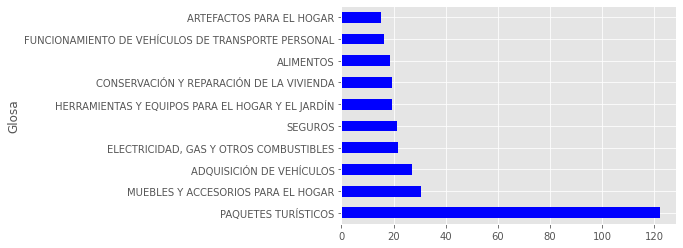

In [51]:
ranking.head(10).round(1).plot.barh(color='blue')

# Productos

In [52]:
productos = ['ARROZ',
'PISCO',
'TELAS PARA CONFECCIÓN DE VESTUARIO',
'ARRIENDO',
'CAMA',
'MEDICAMENTOS ANTIINFECCIOSOS, ANTIVIRALES Y ANTIFUNGICOS',
'AUTOMÓVIL NUEVO',
'EQUIPO DE TELEFONÍA MÓVIL',
'TELEVISOR',
'SERVICIO DE EDUCACIÓN DE JARDÍN INFANTIL',
'ALIMENTOS CONSUMIDOS FUERA DEL HOGAR',
'SERVICIOS DE PELUQUERÍA',
'CAFÉ Y SUCEDÁNEOS',
'CIGARRILLOS',
'ZAPATILLAS PARA HOMBRE',
'MATERIALES PARA LA REPARACIÓN DE LA VIVIENDA',
'TEXTILES PARA CAMA',
'CONSULTA MÉDICA',
'REPUESTOS PARA EL FUNCIONAMIENTO ELÉCTRICO DEL AUTOMÓVIL',
'SERVICIO DE CONEXIÓN INTERNET',
'JUGUETES',
'SERVICIO DE EDUCACIÓN DE LA ENSEÑANZA MEDIA',
'SERVICIO DE ALOJAMIENTO TURÍSTICO',
'JOYAS',
'AGUA POTABLE',
'CALEFÓN',
'SERVICIO DE HOSPITALIZACIÓN',
'SERVICIO DE TRANSPORTE EN TAXI COLECTIVO',
'SERVICIOS PRESTADOS POR CENTROS RECREATIVOS',
'SERVICIO DE PRE UNIVERSITARIO',
'SEGUROS',
'ELECTRICIDAD',
'VAJILLA',
'TEXTO ESCOLAR',
'SERVICIO DE ENSEÑANZA EN CENTROS DE FORMACIÓN TÉCNICA',
'GASTO FINANCIERO',
'HERRAMIENTAS ELÉCTRICAS Y ACCESORIOS',
'PAQUETE TURÍSTICO',
'CURSOS DE CAPACITACIÓN',
'SERVICIO DE EMISIÓN DE CERTIFICADO',
'AROMATIZADOR Y DESINFECTANTE AMBIENTAL',
'CARNE DE VACUNO',
'VINO',
'ROPA DE ABRIGO PARA HOMBRE',
'SERVICIO DE REPARACIÓN DE MUEBLES',
'PRODUCTOS PARA LA CURACIÓN DE HERIDAS',
'MOTOCICLETA',
'CÁMARA FOTOGRÁFICA',
'AFEITADORA Y DEPILADORA ELÉCTRICA',
'AGUA EMBOTELLADA',
'SERVICIOS PARA LA CONSERVACIÓN Y REPARACIÓN DE LA VIVIENDA',
'CONSULTA Y TRATAMIENTO ODONTOLÓGICO',
'GASOLINA',
'IMPLEMENTOS DEPORTIVOS',
'ARTÍCULOS PARA TRANSPORTE DE EFECTOS PERSONALES',
'SERVICIO DE RETIRO DE BASURA',
'ELECTRODOMÉSTICOS PEQUEÑOS DE COCINA',
'SERVICIO DE TRANSPORTE AÉREO',
'ENTRADA AL CINE',
'GAS POR RED',
'DIARIO',
'SERVICIO DOMÉSTICO',
'PESCADOS',
'CERVEZA',
'ARTÍCULOS PARA REPARACIÓN DE VESTUARIO',
'LENTES DE CORRECCIÓN',
'BICICLETA',
'COMPUTADOR',
'EXAMEN DE  IMAGENOLOGÍA Y RADIOLOGÍA',
'SERVICIO DE MANTENCIÓN Y REPARACIÓN DEL AUTOMÓVIL',
'FLORES',
'SERVICIO DE ALARMA PARA LA VIVIENDA',
'SERVICIO DE REPARACIÓN DE LÍNEA BLANCA Y ELECTRODOMÉSTICOS',
'SERVICIO DE TRANSPORTE MULTIMODAL',
'JUEGOS DE AZAR',
'CARBÓN',
'CUADERNO',
'LECHE EN POLVO',
'SERVICIO DE LIMPIEZA Y REPARACIÓN DE VESTUARIO',
'UNIDAD DE ALMACENAMIENTO DIGITAL',
'SERVICIO DE ESTACIONAMIENTO',
'ALIMENTOS PARA MASCOTAS',
'MANTEQUILLA',
'SERVICIOS VETERINARIOS',
'MANZANA',
'ACELGA Y ESPINACA',
'AZÚCAR',
'SAL',
'HARINA',
'ALFOMBRA Y OTROS REVESTIMIENTOS PARA PISOS',
'AUTOMÓVIL USADO',
'EQUIPO DE SONIDO',
'PLATOS PREPARADOS PARA LLEVAR',
'TÉ',
'ZAPATILLAS PARA MUJER',
'SERVICIO DE TRANSPORTE EN BUS INTERURBANO',
'CLASES DEPORTIVAS',
'LIBRO',
'ACCESORIOS DE ILUMINACIÓN',
'ARTÍCULOS DE LIMPIEZA',
'CARNE DE CERDO',
'ROPA DE ABRIGO PARA MUJER',
'PRODUCTOS DE HIGIENE BUCAL',
'BEBIDA GASEOSA',
'LUBRICANTES Y ACEITES PARA EL AUTOMÓVIL',
'SERVICIO DE REVELADO FOTOGRÁFICO',
'GAS LICUADO',
'MARISCOS',
'SERVICIO DE OTROS PROFESIONALES DE LA SALUD',
'GASTO COMÚN',
'ARTÍCULOS DE ESCRITORIO',
'YOGHURT',
'SERVICIO DE PEAJE',
'ACEITE VEGETAL',
'FRUTOS SECOS',
'LEGUMBRES',
'MERMELADA',
'SALSAS',
'PAN',
'SABORIZANTE PARA LECHE',
'ZAPATILLA INFANTIL',
'CARNE DE PAVO',
'ROPA DE ABRIGO INFANTIL',
'CREMAS PARA LA PIEL',
'JUGO LÍQUIDO',
'SERVICIO DE TELEVISIÓN PAGADA RESIDENCIAL',
'PESCADOS EN CONSERVA',
'QUESO',
'PAPA',
'CARAMELOS Y GOMA DE MASCAR',
'SOPAS Y CREMAS',
'PASTAS',
'CECINAS',
'UNIFORME Y ROPA DEPORTIVA ESCOLAR',
'HUEVOS',
'HELADO',
'RON',
'COLCHÓN',
'MEDICAMENTOS PARA EL APARATO CARDIOVASCULAR',
'SERVICIO DE EDUCACIÓN DE TRANSICIÓN',
'SANDWICH Y COMPLETO CONSUMIDO FUERA DEL HOGAR',
'SERVICIOS  EN CENTROS DE ESTÉTICA',
'ZAPATOS PARA HOMBRE',
'PINTURA Y BARNIZ',
'TEXTILES PARA BAÑO Y COCINA',
'PROCEDIMIENTO E INTERVENCIÓN QUIRÚRGICA  AMBULATORIA',
'NEUMÁTICOS Y LLANTAS',
'SERVICIO DE BANDA ANCHA MÓVIL',
'CONSOLA DE VIDEOJUEGO',
'RELOJ  DE PULSERA',
'COCINA',
'SERVICIO DE TRANSPORTE EN TAXI',
'ENTRADA A ESPECTÁCULOS DEPORTIVOS',
'UTENSILIOS DE COCINA',
'SERVICIO DE ENSEÑANZA EN INSTITUTO PROFESIONAL',
'HERRAMIENTAS MANUALES Y ACCESORIOS',
'SERVICIO DE FOTOCOPIADO',
'DETERGENTE Y SUAVIZANTE PARA ROPA',
'VINO ESPUMOSO',
'PANTALON LARGO Y CORTO PARA HOMBRE',
'PRESERVATIVOS',
'MÁQUINA DE AFEITAR DESECHABLE',
'PETRÓLEO DIÉSEL',
'ARTÍCULOS DE CAMPING',
'ARTÍCULOS PARA TRANSPORTE DE BEBÉ',
'PLANCHA',
'ENTRADA A ESPECTÁCULOS CULTURALES',
'ACCESORIOS DE VESTIR',
'ARTÍCULOS PARA MEDIR PARÁMETROS DE SALUD',
'IMPRESORA',
'EXAMEN DE LABORATORIO CLÍNICO',
'SERVICIO DE LAVADO DEL AUTOMÓVIL',
'PLANTAS',
'PARAFINA',
'MATERIALES PARA ARTES MANUALES',
'LECHE LÍQUIDA',
'ACCESORIOS PARA MASCOTAS',
'MARGARINA',
'NARANJA',
'CEBOLLA Y CEBOLLÍN',
'ENDULZANTE',
'HIERBAS, ESPECIAS Y CONDIMENTOS',
'CEREAL',
'ARTÍCULOS ORNAMENTALES',
'REPRODUCTOR PORTÁTIL DE AUDIO Y VIDEO',
'ZAPATOS PARA MUJER',
'CLASES RECREATIVAS',
'ARTÍCULOS DE CERRAJERÍA',
'SERVILLETAS  Y TOALLA DE PAPEL',
'PANTALÓN, FALDA Y VESTIDO PARA MUJER',
'PAPEL HIGIÉNICO',
'BEBIDA ISOTÓNICA Y ENERGIZANTE',
'POSTRES LÁCTEOS',
'LICENCIA DE CONDUCIR',
'FRUTAS EN CONSERVA',
'MANJAR Y DULCES UNTABLES',
'ADEREZOS',
'GALLETA',
'ZAPATO INFANTIL',
'CARNE DE POLLO',
'PANTALÓN, FALDA Y VESTIDO INFANTIL',
'PRODUCTOS DE MAQUILLAJE',
'JUGO EN POLVO',
'SERVICIO DE SUSCRIPCIÓN EN LINEA',
'MARISCOS EN CONSERVA',
'PAPAS CONGELADAS Y DESHIDRATADAS',
'CHOCOLATE',
'ALIMENTOS PARA BEBÉ',
'HAMBURGUESA',
'WHISKY',
'MUEBLES DE COMEDOR',
'HORMONAS Y MEDICAMENTOS PARA EL SISTEMA GENITO-URINARIO',
'SERVICIO DE EDUCACIÓN DE 1° CICLO DE LA ENSEÑANZA BÁSICA',
'BEBIDA ALCOHÓLICA CONSUMIDA FUERA DEL HOGAR',
'GRIFERIA Y ACCESORIOS',
'TEXTILES PARA LIVING Y COMEDOR',
'REPUESTOS Y ACCESORIOS PARA EL FUNCIONAMIENTO MECÁNICO DEL AUTOMÓVIL',
'SERVICIO DE PACK DE TELECOMUNICACIONES',
'ARTÍCULOS PARA CALEFACCIÓN DEL HOGAR',
'SERVICIO DE TRANSPORTE ESCOLAR',
'ENTRADA A CENTROS DE DIVERSIÓN NOCTURNOS',
'SERVICIO DE ENSEÑANZA UNIVERSITARIA',
'MEMBRESÍA EN ASOCIACIÓN PROFESIONAL',
'LAVALOZA',
'CAMISA Y POLERA PARA HOMBRE',
'ARTÍCULOS DIVERSOS PARA EL CUIDADO PERSONAL',
'INSTRUMENTOS MUSICALES',
'LENTES DE SOL',
'LEÑA',
'LECHE CONSERVADA',
'PERA',
'LECHUGA',
'CALZADO DE ESTACIÓN PARA MUJER',
'ACCESORIOS ELÉCTRICOS',
'BLUSA Y POLERA PARA MUJER',
'JABÓN',
'REVISIÓN TÉCNICA DEL AUTOMÓVIL',
'PRODUCTOS DE REPOSTERÍA',
'CALZADO ESCOLAR',
'CAMISA, BLUSA Y POLERA INFANTIL',
'TINTURAS Y FIJADORES',
'PAPAS FRITAS',
'POSTRES NO LÁCTEOS',
'VODKA',
'MUEBLES PARA COCINA',
'MEDICAMENTOS ANTIINFLAMATORIOS NO CORTICOIDES, ANTIMIGRAÑOSOS Y  SISTEMA OSTEO-MUSCULAR',
'SERVICIO DE EDUCACIÓN DE 2° CICLO DE LA ENSEÑANZA BÁSICA',
'BEBIDA NO ALCOHÓLICA CONSUMIDA FUERA DEL HOGAR',
'SELLANTES Y PEGAMENTOS',
'SERVICIO DE TELEFONÍA MÓVIL',
'HORNOS ELÉCTRICOS Y MICROONDAS',
'SERVICIO DE TRANSPORTE EN MICROBUS',
'SERVICIOS DE FIESTAS DE CUMPLEAÑOS',
'SERVICIO DE ENSEÑANZA DE POST GRADO Y POSTÍTULO',
'SERVICIO NOTARIAL',
'LIMPIADOR',
'ROPA INTERIOR Y DE DORMIR PARA HOMBRE',
'BLOQUEADORES Y BRONCEADORES',
'PLÁTANO',
'LIMÓN',
'PILAS',
'ROPA DEPORTIVA Y DE BAÑO PARA MUJER',
'PAÑALES DESECHABLES',
'MASAS SALADAS PREPARADAS',
'ROPA DEPORTIVA, SHORTS, BERMUDAS Y TRAJES DE BAÑO INFANTIL',
'MUEBLES PARA LIVING',
'MEDICAMENTOS PARA EL SISTEMA RESPIRATORIO',
'HELADOS Y POSTRES CONSUMIDOS FUERA DEL HOGAR',
'SERVICIO DE TELEFONÍA FIJA',
'LAVADORA',
'SERVICIO DE TRANSFER',
'GIMNASIOS',
'SERVICIO FUNERARIO',
'INSECTICIDAS Y SIMILARES',
'COLONIAS Y PERFUMES',
'FRUTAS DE ESTACIÓN',
'PALTA',
'ROPA INTERIOR Y DE DORMIR PARA MUJER',
'PROTECCIÓN HIGIÉNICA FEMENINA',
'SNACK',
'ROPA INTERIOR Y DE DORMIR INFANTIL',
'MEDICAMENTOS DERMATOLÓGICOS, DESINFECTANTES Y ANTISÉPTICOS',
'REFRIGERADOR',
'CUOTAS EN CENTROS DE PADRES Y APODERADOS',
'DESODORANTES Y ANTITRANSPIRANTES',
'PIMENTÓN Y PIMIENTO',
'SHAMPOO Y BÁLSAMO',
'VESTUARIO PARA LACTANTE',
'MEDICAMENTOS PARA EL SISTEMA NERVIOSO CENTRAL',
'SERVICIO DE RESIDENCIAS PARA ADULTOS MAYORES',
'TOMATE',
'MEDICAMENTOS PARA EL APARATO DIGESTIVO Y METABÓLICO',
'SERVICIO DE SALA CUNA',
'ZANAHORIA',
'PREPARADOS OFTALMOLÓGICOS',
'ZAPALLO',
'MEDICAMENTOS PARA EL TRATAMIENTO DEL CÁNCER, MODIFICADORES DEL SISTEMA INMUNE Y FÁRMACOS UTILIZADOS EN LOS CUIDADOS PALIATIVOS DEL DOLOR',
'ZAPALLO ITALIANO',
'MEDICAMENTOS HOMEOPÁTICOS Y SUPLEMENTOS ALIMENTICIOS',
'VERDURAS DE ESTACIÓN',
'VERDURAS CONGELADAS',
'VERDURAS EN CONSERVA',
'VERDURAS ENCURTIDAS']

In [53]:
div = data[['Fecha', 'Glosa','Índice']]
div = div[div['Glosa'].isin(productos)]
div = div.set_index(['Fecha', 'Glosa'])
div['i0'] = div.groupby(level='Glosa').transform('first')
div['index'] = div['Índice'] / div['i0'] * 100
div = div[['index']].reset_index()
div = pd.pivot_table(div, values='index', index='Fecha', columns='Glosa')

In [54]:
ranking = (div.loc['2021-11-01'].sort_values(ascending=False) - 100 ).round(1)
orden = ranking.index
ranking.head(20)

Glosa
PAQUETE TURÍSTICO               122.3
PIMENTÓN Y PIMIENTO              99.7
JOYAS                            71.8
ZAPATILLAS PARA HOMBRE           58.7
ZAPATILLAS PARA MUJER            52.2
PLÁTANO                          51.0
SERVICIO DE TRANSPORTE AÉREO     50.8
CAMA                             47.8
FLORES                           47.3
COCINA                           46.9
CARNE DE VACUNO                  43.7
COLCHÓN                          43.6
TOMATE                           40.6
GAS LICUADO                      38.7
SERVICIO DE FOTOCOPIADO          36.5
IMPRESORA                        35.1
MOTOCICLETA                      34.4
DIARIO                           33.1
INSTRUMENTOS MUSICALES           33.0
CARNE DE CERDO                   32.4
Name: 2021-11-01 00:00:00, dtype: float64

In [55]:
ranking.tail(20)

Glosa
CERVEZA                                 -7.2
GASTO COMÚN                             -7.3
BLUSA Y POLERA PARA MUJER               -8.1
ROPA DE ABRIGO INFANTIL                 -8.4
VESTUARIO PARA LACTANTE                 -8.9
CAMISA Y POLERA PARA HOMBRE             -9.2
ZAPATO INFANTIL                         -9.8
ZAPATOS PARA HOMBRE                    -11.4
ARTÍCULOS DE CAMPING                   -11.5
CONSOLA DE VIDEOJUEGO                  -11.8
CALZADO DE ESTACIÓN PARA MUJER         -13.5
ROPA DE ABRIGO PARA MUJER              -15.4
ZAPATOS PARA MUJER                     -16.5
EQUIPO DE TELEFONÍA MÓVIL              -20.7
ROPA DE ABRIGO PARA HOMBRE             -21.5
PANTALÓN, FALDA Y VESTIDO PARA MUJER   -24.6
UNIDAD DE ALMACENAMIENTO DIGITAL       -24.9
CAMISA, BLUSA Y POLERA INFANTIL        -29.9
ROPA DEPORTIVA Y DE BAÑO PARA MUJER    -31.4
LIMÓN                                  -52.1
Name: 2021-11-01 00:00:00, dtype: float64

<AxesSubplot:ylabel='Glosa'>

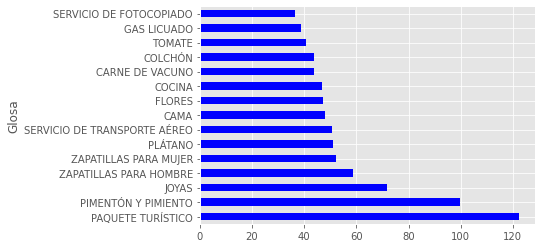

In [56]:
ranking.head(15).round(1).plot.barh(color='blue')

# Incidencias 12 meses

In [57]:
data = pd.read_csv('ipc.csv', na_values=' ')
data.columns = ['Year', 'Month', 'División', 'Grupo', 'Clase', 'Subclase', 'Producto',
       'Glosa', 'Ponderación', 'Índice', 'Variación Mensual  ( % )',
       'Variación Acumulada   ( % )', 'Variación 12 Meses   ( % )',
       'Incidencia Mensual   ( % )', 'Incidencia Acumulada    ( % )',
       'Incidencia 12 Meses']
data['Fecha'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))
data = data[['Fecha', 'División', 'Grupo', 'Clase', 'Subclase', 'Producto', 'Glosa', 'Incidencia 12 Meses']]

In [58]:
div = data[['Fecha', 'Glosa','Incidencia 12 Meses']]
div = div[div['Glosa'].isin(division)]
div = div.set_index(['Fecha', 'Glosa'])

<AxesSubplot:title={'center':'Incidencia 12 meses'}, ylabel='Glosa'>

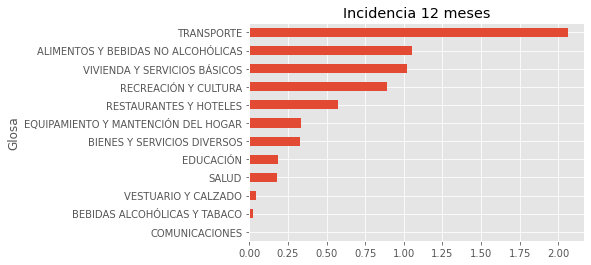

In [59]:
div.loc['2021-11-01'].reset_index().set_index('Glosa').drop('Fecha', axis=1).sort_values('Incidencia 12 Meses', ascending=True).plot.barh(legend=False, title='Incidencia 12 meses')

In [60]:
div.loc['2021-11-01'].reset_index().set_index('Glosa').drop('Fecha', axis=1).sort_values('Incidencia 12 Meses', ascending=True)

,Incidencia 12 Meses
Glosa,
COMUNICACIONES,0.002
BEBIDAS ALCOHÓLICAS Y TABACO,0.023
VESTUARIO Y CALZADO,0.047
SALUD,0.181
EDUCACIÓN,0.187
BIENES Y SERVICIOS DIVERSOS,0.326
EQUIPAMIENTO Y MANTENCIÓN DEL HOGAR,0.332
RESTAURANTES Y HOTELES,0.574
RECREACIÓN Y CULTURA,0.892


In [61]:
div.loc['2021-11-01'].reset_index().set_index('Glosa').drop('Fecha', axis=1).sort_values('Incidencia 12 Meses', ascending=True).sum()

Incidencia 12 Meses    6.702
dtype: float64